# Tarea 1 Redes Neuronales Artificiales

Andrea Figueroa, 
Alejandro Sazo

## Ejercicio 1

(a) Generación de data aleatoria que represente la función lógica $xor$. Se generan 1000 datos de prueba y 1000 de entrenamiento.

In [2]:
# Importar Librerías
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD

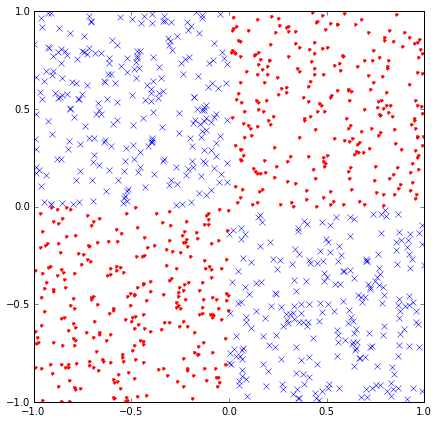

In [3]:
# Guardar semilla para numeros aleatorios
seed = 21
np.random.seed(seed)

def generate_data(n):
    
    # Lista para guardar datos etiquetados
    output = list()
    
    # Generación de n tuplas aleatorias
    input = 2 * np.random.random_sample((n,2)) - 1
    # Asignación datos dependiendo del cuadrante
    for i in input:
        # Cuadrante 1
        if i[0] > 0 and i[1] > 0:
            output.append(0)
        # Cuadrante 2
        elif i[0] < 0 and i[1] > 0: 
            output.append(1)
        # Cuadrante 3
        elif i[0] < 0 and i[1] < 0: 
            output.append(0)
        # Cuadrante 4
        elif i[0] > 0 and i[1] < 0: 
            output.append(1)
    return input, output

(x_training, y_training) = generate_data(1000)
(x_test, y_test) = generate_data(1000)

# Plot de datos de entrenamiento
%matplotlib inline
plt.figure(figsize=(7,7))
set1 = x_training[np.logical_and(x_training[:,0] < 0, x_training[:,1] < 0)]
set2 = x_training[np.logical_and(x_training[:,0] < 0, x_training[:,1] > 0)]
set3 = x_training[np.logical_and(x_training[:,0] > 0, x_training[:,1] > 0)]
set4 = x_training[np.logical_and(x_training[:,0] > 0, x_training[:,1] < 0)]
set1 = np.concatenate((set1, set3), axis=0)
set2 = np.concatenate((set2, set4), axis=0)
plt.plot(set1[:,0], set1[:,1], 'r.')
plt.plot(set2[:,0], set2[:,1], 'bx')
plt.show()

(b) Generación de una neurona. Ha sido entrenada con 1000 epochs.

In [55]:
# Creación de una neurona
model = Sequential()

# Dimensión input = 1, Dimensión output = 2, función de activación es Relu
model.add(Dense(output_dim=1, input_dim=2, init="normal"))
model.add(Activation("sigmoid"))
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

print "Neurona inicializada"

# Entrenar a la neurona
model.fit(x_training, y_training, nb_epoch=1000,verbose=0)

print "Neurona entrenada"

# Evaluar la neurona
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=1000)
print "Loss: " 
print loss_and_metrics[0]
print "Accuracy: "
print loss_and_metrics[1]*100

Neurona inicializada
Neurona entrenada
1000/1000 [==============================] - 0s
Loss: 
0.24980071187
Accuracy: 
51.4999985695


In [4]:
print round(model.predict(np.array([-1,-1]).reshape(1,2))[0][0],4)
print round(model.predict(np.array([1,1]).reshape(1,2))[0][0],4)
print round(model.predict(np.array([-1,1]).reshape(1,2))[0][0],4)
print round(model.predict(np.array([1,-1]).reshape(1,2))[0][0],4)

0.467
0.4841
0.4714
0.4796


Como se puede apreciar, la neurona a pesar de la cantidad de datos de entrenamiento utilizados, no es capaz de aprender la función XOR arrojando resultados inconsistentes, siendo incapaz de clasificar de forma determinante los ejemplos de testing en alguna clase.

(c) Una arquitectura de perceptron multicapa con 8 neuronas en su capa oculta permite aprender XOR de forma efectiva.

In [54]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

xor = Sequential()
# Dimensión input = 2, Dimensión output = 1, función de activación es Relu
xor.add(Dense(8, input_dim = 2, activation = "relu"))
xor.add(Dense(1, activation = "sigmoid"))
xor.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

print "Red inicializada"

# Entrenar a la neurona
xor.fit(x_training, y_training, nb_epoch=1000, verbose=0)

print "Red entrenada"

# Evaluar la neurona
evaluacion = xor.evaluate(x_test, y_test, batch_size=1000)
print "Loss: " 
print evaluacion[0]
print "Accuracy: "
print evaluacion[1]*100

Red inicializada
Red entrenada
1000/1000 [==============================] - 0s
Loss: 
0.0365891009569
Accuracy: 
98.6000001431


In [12]:
print xor.predict_classes(np.array([-1,-1]).reshape(1,2))[0][0]
print xor.predict_classes(np.array([1,1]).reshape(1,2))[0][0]
print xor.predict_classes(np.array([-1,1]).reshape(1,2))[0][0]
print xor.predict_classes(np.array([1,-1]).reshape(1,2))[0][0]

1/1 [==============================] - 0s
0
1/1 [==============================] - 0s
0
1/1 [==============================] - 0s
1
1/1 [==============================] - 0s
1


## Ejercicio 2

(a) Construcción del dataframe para el set Boston Housing. Este set se divide para generar el training set y el testing set. Del total de datos, el 25% se deja aparte para pruebas y el restante 75% permanece para entrenamiento.

In [14]:
import pandas as pd
url = 'http://mldata.org/repository/data/download/csv/regression-datasets-housing/'
df = pd.read_csv(url, sep=',',header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
'RM', 'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
from sklearn.cross_validation import train_test_split
df_train, df_test = train_test_split(df,test_size=0.25, random_state=0)

(b) Descripción del dataset.

In [15]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null int64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null int64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(9), int64(5)
memory usage: 59.3 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.347826,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.083004,356.674032,12.653063,22.532806
std,8.601545,23.310593,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.280574,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.000000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.000000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.000000,391.440000,11.360000,21.200000
75%,3.677082,12.000000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.000000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


c) Normalización de datos. Este procedimiento es necesario para evitar cualquier clase de problemas con la convergencia de nuestra función de optimización, pues es posible que debido a los diversos rangos de datos la convergencia favorezca a ciertos valores, deteniéndose el algoritmo en un punto donde se ha aprendido mal sobre el training set y no se tenga capacidad de generalización.

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(df_test),columns=df_test.columns)
y_train_scaled = X_train_scaled.pop('MEDV')
y_test_scaled = X_test_scaled.pop('MEDV')

d) Gráfico de MSE versus número de epochs utilizados para entrenar para red FF de 3 capas, 200 unidades ocultas y activación sigmoidal entrenada con SGD con parámetros $\eta$=0.2 y 300 epochs de entrenamiento.

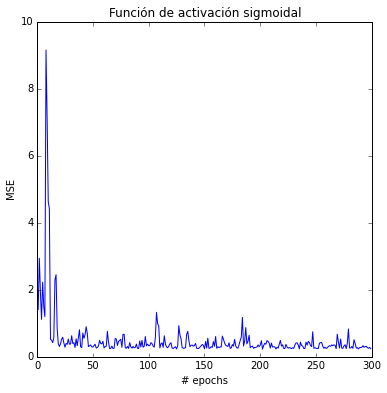

In [20]:
def generate_model(optimizer, activation):
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
    model.add(Activation(activation))
    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))

    model.compile(optimizer=optimizer,loss='mean_squared_error')
    
    return model

sgd = SGD(lr=0.02)
model_d = generate_model(sgd,"sigmoid") 

hist = model_d.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), 
     nb_epoch=300, verbose=0, 
     validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    

%matplotlib inline
epochs = np.arange(300)
plt.figure(figsize=(6,6))
plt.plot(epochs, hist.history['loss'], 'b-')
plt.title(u"Función de activación sigmoidal")
plt.xlabel("# epochs")
plt.ylabel("MSE")
plt.show()

e) Variar función de activación cambiandola por ReLu.

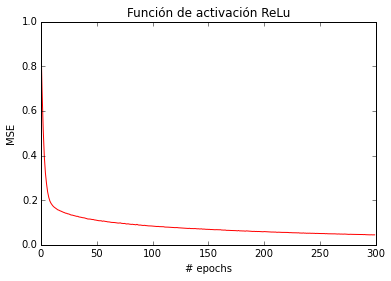

In [21]:
sgd = SGD(lr=0.02)
model2 = generate_model(sgd, "relu")

hist2 = model2.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), 
                   nb_epoch=300, verbose=0, 
                   validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))

%matplotlib inline
epochs = np.arange(300)
plt.plot(epochs, hist2.history['loss'], 'r-')
plt.title(u"Función de activación ReLu")
plt.xlabel("# epochs")
plt.ylabel("MSE")
plt.show()

f) Variar learning rate

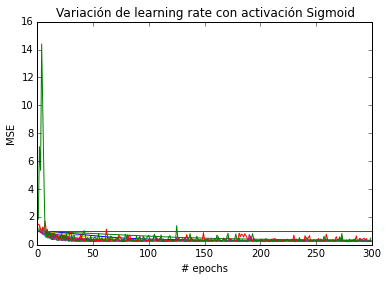

In [41]:
n_lr = 20
lear_rate = np.linspace(0,0.02,n_lr)

%matplotlib inline
epochs = np.arange(300)
colors = ['r', 'g', 'b', 'y', 'c', 'm']
for n, i in enumerate(lear_rate):
    sgd = SGD(lr=i)
    model = generate_model(sgd, "sigmoid")
    
    hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), 
                   nb_epoch=300, verbose=0, 
                   validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    plt.plot(epochs, hist.history['loss'], color=colors[n % len(colors)])
    
plt.title(u"Variación de learning rate con activación Sigmoid")
plt.xlabel("# epochs")
plt.ylabel("MSE")
plt.show()

g) Validación cruzada variando el número de folds

In [45]:
from sklearn import cross_validation

Xm = X_train_scaled.as_matrix()
ym = y_train_scaled.as_matrix()
mse_cvs1 = []
mse_cvs2 = []
for nfold in [5, 10]:
    kfold = cross_validation.KFold(len(Xm), nfold)
    cvscores1 = []
    cvscores2 = []
    for i, (train, val) in enumerate(kfold):
        # create models
        sgd = SGD(lr=0.02)
        model1 = generate_model(sgd, 'sigmoid')
        model2 = generate_model(sgd, 'relu')
        # Fit the models
        model1.fit(Xm[train], ym[train], nb_epoch=300, verbose=0)
        model2.fit(Xm[train], ym[train], nb_epoch=300, verbose=0)
        # evaluate the models
        # sigmoid score
        scores1 = model1.evaluate(Xm[val], ym[val])
        # relu score
        scores2 = model2.evaluate(Xm[val], ym[val])
        # Store values
        cvscores1.append(scores1)
        cvscores2.append(scores2)
    mse_cvs1.append(np.mean(cvscores1))
    mse_cvs2.append(np.mean(cvscores2))

print "Results for sigmoid and CV"
print mse_cvs1
print "Results for relu and CV"
print mse_cvs2

32/37 [========================>.....] - ETA: 0sResults for sigmoid and CV
[0.36416774598339147, 0.28536170629379076]
Results for relu and CV
[0.1312290781088043, 0.13420869662197224]


h) Entrenar el modelo en d) usando progressive decay

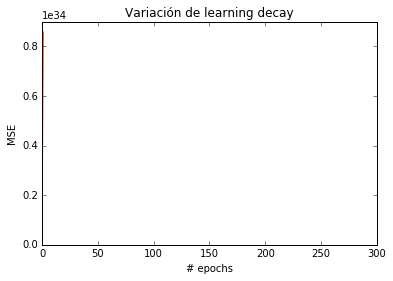

In [37]:
n_decay = 10
lear_decay = np.logspace(-6,0,n_decay)

%matplotlib inline
epochs = np.arange(300)

for i in lear_decay:
    sgd = SGD(lr=0.02, decay=i)
    model = generate_model(sgd, "sigmoid")
    
    hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), 
                   nb_epoch=300, verbose=0, 
                   validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    plt.plot(epochs, hist.history['loss'], 'r-')
    
plt.title(u"Variación de learning decay")
plt.xlabel("# epochs")
plt.ylabel("MSE")
plt.show()

i) Entrenar el modelo en d) usando momentum

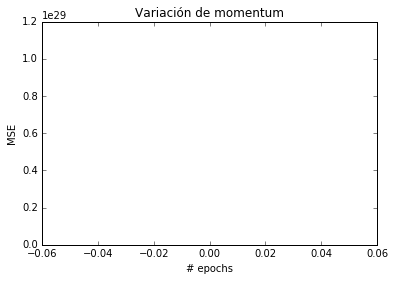

In [38]:
n_decay = 21
momentum = np.linspace(0,1,n_decay)

%matplotlib inline
epochs = np.arange(300)

for i in momentum:
    sgd = SGD(lr=0.02,momentum=i)
    model = generate_model(sgd, "sigmoid")
    
    hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), 
                   nb_epoch=300, verbose=0, 
                   validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    plt.plot(epochs, hist.history['loss'], 'r-')
    
plt.title(u"Variación de momentum")
plt.xlabel("# epochs")
plt.ylabel("MSE")
plt.show()
# Ver que se muestre más bonito xD

j) Entrenar el modelo en d) y e) cambiando el tamaño del batch. Comparar sgd, batch y mini-batch

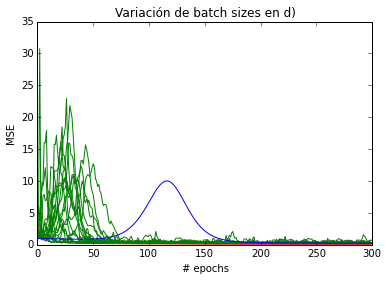

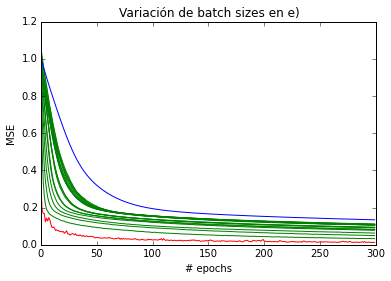

In [47]:
n_batches = 21
batch_sizes = np.round(np.linspace(1,X_train_scaled.shape[0],n_batches))

%matplotlib inline
epochs = np.arange(300)


for i in batch_sizes:
    sgd = SGD(lr=0.02)
    model = generate_model(sgd, "sigmoid")
    
    hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), 
                   batch_size=i, nb_epoch=300, verbose=0, 
                   validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    if i == 1:
        plt.plot(epochs, hist.history['loss'], 'r-')
    elif i == X_train_scaled.shape[0]:
        plt.plot(epochs, hist.history['loss'], 'b-')
    else:
        plt.plot(epochs, hist.history['loss'], 'g-')
    
plt.title(u"Variación de batch sizes en d)")
plt.xlabel("# epochs")
plt.ylabel("MSE")
plt.show()


%matplotlib inline
epochs = np.arange(300)

for i in batch_sizes:
    sgd = SGD(lr=0.02)
    model = generate_model(sgd, "relu")
    
    hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), 
                   batch_size=i, nb_epoch=300, verbose=0, 
                   validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    if i == 1:
        plt.plot(epochs, hist.history['loss'], 'r-')
    elif i == X_train_scaled.shape[0]:
        plt.plot(epochs, hist.history['loss'], 'b-')
    else:
        plt.plot(epochs, hist.history['loss'], 'g-')
    
plt.title(u"Variación de batch sizes en e)")
plt.xlabel("# epochs")
plt.ylabel("MSE")
plt.show()

## Ejercicio 3

a) La función $\texttt{load_CIFAR10}$ permite generar el training set, testing set y validation set a partir de los datos de CIFAR-

In [29]:
import cPickle as pickle
import os
from scipy.misc import imread
# Inicializar semilla aleatoria
np.random.seed(20)

# Carga de un archivo de CIFAR
def load_CIFAR_one(filename):
    with open(filename, 'rb') as f:
        datadict = pickle.load(f)
        X = datadict['data']
        Y = datadict['labels']
        Y = np.array(Y)
        return X, Y

# Carga todos los archivos CIFAR y generar Training set, Testing set y Validation set
def load_CIFAR10(PATH, n_files=6):
    xs = []
    ys = []
    # Juntar toda la data de entrenamiento
    for b in range(1, n_files):
        f = os.path.join(PATH, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_one(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    # Obtener subconjunto para validacion a partir de data de entrenamiento
    v_size = np.random.randint(1000, 5000)
    indices = np.random.choice(np.arange(Xtr.shape[0]), v_size)
    mask_tr = np.ones(Xtr.shape[0], dtype=bool)
    mask_tr[indices] = False
    mask_v = np.invert(mask_tr)
    Xv = Xtr[mask_v]
    Yv = Ytr[mask_v]
    Xtr = Xtr[mask_tr]
    Ytr = Ytr[mask_tr]
    # Obtener data de prueba
    Xte, Yte = load_CIFAR_one(os.path.join(PATH, 'test_batch'))
    return Xtr, Ytr, Xte, Yte, Xv, Yv

# Cargar desde carpeta local data
Xtr, Ytr, Xte, Yte, Xv, Yv = load_CIFAR10("data")

b) Escalamiento y centrado de datos. Aparte de las ventajas mencionadas anteriormente, los resultados experimentales con datos no centrados y no escalados ofrecen resultados peores que si la data se normaliza.

In [30]:
from sklearn.preprocessing import StandardScaler

# Centrar dataset y escalar segun preferencia
def preprocess(X, with_mean=True, with_std=True):
    scaler = StandardScaler(with_mean, with_std).fit(X)
    return scaler.transform(X)

# Data solo centrada
#Xtr_c = preprocess(Xtr, with_mean=True, with_std=False)
# Data solo escalada
#Xtr_s = preprocess(Xtr, with_mean=False, with_std=True)
# Data centrada y escalada

# Centrar y escalar datos de entrenamiento y validación
Xtr_cs = preprocess(Xtr)
Xv_cs = preprocess(Xv)
Xte_cs = preprocess(Xte)

/usr/lib64/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/lib64/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/lib64/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/lib64/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/lib64/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warning

c) Creación de red neuronal para problema CIFAR. En primer lugar se adaptan las etiquetas a una representación manejable por la red.

In [31]:
# Dimension de ejemplos, vectores de 3072 features (32x32x3 pixeles)
input_dim = Xtr.shape[1]
from keras.utils.np_utils import to_categorical
Ytr_conv = to_categorical(Ytr,10)
Yv_conv = to_categorical(Yv,10)
Yte_conv = to_categorical(Yte,10)

In [36]:
# Modelo 1: Red simple de 1 capa
MLPmodel = Sequential()
MLPmodel.add(Dense(50, input_dim=input_dim, init='uniform'))
MLPmodel.add(Activation('relu'))
MLPmodel.add(Dense(10))
MLPmodel.add(Activation('softmax'))
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=False)
MLPmodel.compile(loss='mse',
              optimizer=sgd,
              metrics=['accuracy'])

In [37]:
MLPmodel.fit(Xtr_cs, Ytr_conv, nb_epoch=20, batch_size=16, verbose=0)

In [38]:
score = MLPmodel.evaluate(Xv_cs, Yv_conv,verbose=0, batch_size=16)
print "Loss:",score[0], "Accuracy:",score[1]

Loss: 0.126673676492 Accuracy: 0.282148799627


In [39]:
# Modelo 2
# Combinacion de capas con activaciones tangente hiperbolica, momentum utilizando nesterov
model2 = Sequential()
model2.add(Dense(50, input_dim=input_dim, init='uniform'))
model2.add(Activation('tanh'))
model2.add(Dense(50, init='uniform'))
model2.add(Activation('tanh'))
model2.add(Dense(10, init='uniform'))
model2.add(Activation('softmax'))
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.8, nesterov=True)
model2.compile(loss='mse',
              optimizer=sgd,
              metrics=['accuracy'])

In [40]:
model2.fit(Xtr_cs, Ytr_conv, nb_epoch=20, batch_size=32, verbose=0)

In [41]:
score = model2.evaluate(Xv_cs, Yv_conv, batch_size=32, verbose=0)
print "Loss:",score[0], "Accuracy:",score[1]

Loss: 0.0710594502123 Accuracy: 0.445923460969


In [65]:
# Modelo 3
# Combinación anterior cambiando funciones tanh por sigmoidales y perdida entropia cruzada
model3 = Sequential()
model3.add(Dense(256, input_dim=input_dim, init='uniform'))
model3.add(Activation('sigmoid'))
model3.add(Dense(256, init='normal'))
model3.add(Activation('sigmoid'))
model3.add(Dense(10, init='normal'))
model3.add(Activation('softmax'))
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.8, nesterov=True)
model3.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [66]:
model3.fit(Xtr_cs, Ytr_conv, nb_epoch=20, batch_size=32, verbose=0)

In [64]:
score = model3.evaluate(Xv_cs, Yv_conv, batch_size=32, verbose=0)
print "Loss:",score[0], "Accuracy:",score[1]

Loss: 1.65634136067 Accuracy: 0.497741858878


(d) Extracción de features y experimentación.

In [81]:
from top_level_features import hog_features
from top_level_features import color_histogram_hsv
from top_level_features import extract_features
Xtr, Ytr, Xte, Yte, Xv, Yv = load_CIFAR10("data")
#features = extract_features(Xtr,[hog_features]) #extrae hog features
#features = extract_features(Xtr,[color_histogram_hsv]) #extrae histogramas de color
#extrae todo
features = extract_features(Xtr,[hog_features, color_histogram_hsv])
features_v = extract_features(Xv,[hog_features, color_histogram_hsv])
features_te = extract_features(Xte,[hog_features, color_histogram_hsv])
print Xtr.shape
print features.shape
print features_v.shape
print features_te.shape

(45713, 32, 32, 3)
(4287, 32, 32, 3)
(10000, 32, 32, 3)
(45713, 3072)
(45713, 154)
(4287, 154)
(10000, 154)


In [82]:
# Combinación anterior cambiando funciones tanh por sigmoidales y perdida entropia cruzada
model3 = Sequential()
model3.add(Dense(256, input_dim=features.shape[1], init='uniform'))
model3.add(Activation('sigmoid'))
model3.add(Dense(256, init='normal'))
model3.add(Activation('sigmoid'))
model3.add(Dense(10, init='normal'))
model3.add(Activation('softmax'))
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.8, nesterov=True)
model3.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

Ytr_conv = to_categorical(Ytr, 10)
Yv_conv = to_categorical(Yv, 10)
Yte_conv = to_categorical(Yte, 10)

model3.fit(features, Ytr_conv, nb_epoch=20, batch_size=32, verbose=0)
print model3.evaluate(features_v, Yv_conv, batch_size=32, verbose=0)
print model3.evaluate(features_te, Yte_conv, batch_size=32, verbose=0)

[1.4739508387479077, 0.57429437843658215]
[1.5654976190567016, 0.5474]
